<h1><u><span style="color:#3399FF;">Stroke Patient Healthcare Using Deep Learning</span></u></h1>


The primary aim of this project is to analyze a healthcare dataset focused on predicting **stroke** occurrences. This dataset includes patient details such as demographic information, medical history, and lifestyle factors. The objective is to estimate the likelihood of a stroke by examining various attributes.

<h4><u>Dataset:</u></h4>

- **Gender and Age**: Fundamental demographic details.
- **Hypertension and Heart Disease**: Medical history relevant to stroke risk.
- **Marital Status**: Indicates whether the individual has ever been married, potentially impacting health outcomes.
- **Employment Type and Residence**: Social factors that may influence health.
- **Average Glucose Level and BMI**: Health indicators linked to metabolic conditions.
- **Smoking Status**: Lifestyle factor associated with stroke risk.
- **Stroke**: The outcome variable, indicating if a stroke has occurred (1) or not (0).

**Dataset Link**: [Click here to access the dataset](https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link)


># **(1) Problem Statement and Basic Metrics**
***

This project aims to analyze a healthcare dataset specific to **stroke** patients, with a focus on identifying significant risk factors contributing to stroke occurrences. Key metrics include age, hypertension, heart disease, BMI, glucose levels, and lifestyle aspects such as smoking habits. By examining these factors, we seek to reveal patterns that support early diagnosis and stroke prevention. The analysis will offer insights into stroke prevalence across various demographics and health conditions, enhancing our understanding of contributing risk factors.

# **(2) Import libraries and Load the dataset**
***

In [173]:
import numpy as np  # Importing NumPy 
import pandas as pd  # Importing Pandas 


In [174]:
# Load .csv dataset into a pandas dataFrame
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")

In [175]:
# shows the top 5 records of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **(3) Data Exploration and Pre-processing**
***

### **Review Basic Metrics and Data Types**

Understanding the dataset's structure, including the number of rows and columns and the data types of each attribute, is a crucial step. Exploring the data is essential for effective analysis.

In [176]:
df.shape  # Returns a tuple representing the number of rows and columns in the DataFrame

(5110, 12)

In [177]:
df.info()  # Provides a summary of the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<h5 style="color: blue;">Observations:</h5>

- **Dataset Dimensions**: Contains 5,110 entries and 12 columns.
- **Data Types**:
  - 4 columns with integer data
  - 3 columns with float data
  - 5 columns with object (categorical) data
- **Missing Values**: The **BMI** column has 101 missing entries; all other columns are fully populated.
- **Attributes**:
  - Demographic Details: **gender**, **age**, **ever_married**, **work_type**, **Residence_type**
  - Health Metrics: **hypertension**, **heart_disease**, **avg_glucose_level**, **bmi**, **smoking_status**, **stroke**
- **Analysis Scope**: The dataset is well-suited for examining the link between demographic factors and stroke risk.


In [178]:
 #Describing the statistical summary of numerical type data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<h5 style="color: blue;">Observations:</h5>

- **Age Range**: The participants have an average age of **43.23 years**, spanning from **0.08** to **82 years**, indicating a broad age distribution.
  
- **Prevalence of Hypertension and Heart Disease**: Approximately **9.75%** of participants have hypertension, and around **5.4%** have a history of heart disease, indicating relatively low prevalence rates.

- **Glucose Levels**: The mean glucose level is **106.15 mg/dL**, with a peak of **271.74 mg/dL**, showing significant variation among participants.

- **Body Mass Index (BMI)**: The average BMI is **28.89 kg/m²**, suggesting a tendency towards overweight in the sample; there are **201 missing values** in the BMI data.

- **Stroke Cases**: Around **4.87%** of participants have had a stroke, indicating a relatively low incidence rate within the dataset.


In [179]:
df.smoking_status.unique()  # Retrieve the unique values in the 'smoking_status' column to analyze different smoking behaviors in the dataset.

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### **Statistical Summary of categorical type data**

In [180]:
# Statistical summary of categorical type data
df.describe(include = object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


<h5 style="color: blue;">Observations:</h5>

- **Gender**: The dataset contains **3 unique categories**, with **Female** being the most represented (2,994 occurrences), highlighting a greater presence of females.

- **Marital Status**: Most participants are **ever married** (3,353 occurrences), indicating that a significant portion of the dataset comprises individuals who have been married at some point.

- **Work Type**: There are **5 distinct work types**, with **Private** employment being the most prevalent (2,925 occurrences), suggesting that many participants are employed in the private sector.

- **Residence Type**: The dataset features **2 residence types**, with **Urban** being more common (2,596 occurrences), indicating a tendency for participants to reside in urban areas.

- **Smoking Status**: There are **4 unique categories** for smoking status, with **never smoked** being the most frequent (1,892 occurrences), suggesting a relatively low rate of smoking among participants.


<h3 style="text-decoration: underline;">Identifying Null Values</h3>

This phase involves both **data cleaning** and **data preprocessing**. Recognizing and handling missing values is a critical component of data cleaning, as it deals with the issue of incomplete data. Depending on the extent of the missing values, you may need to select a strategy for addressing them, such as imputing values or eliminating the affected rows or columns.

Moreover, this step is vital for data preprocessing because missing values can compromise the reliability of future analyses. Addressing these gaps ensures that the data is in the proper format for effective analysis.


In [181]:
# Display the count of missing values for each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [182]:
# Calculate the missing values percentage for each column and round to two decimal places
missing_values_percentage = (df.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:\n")
print(missing_values_percentage)

Missing Values Percentage:

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64


<h5 style="color: blue;">Observations:</h5>

- The dataset is largely complete, with most columns showing **0% missing data**.
- The **'bmi'** column is the only one with missing values, accounting for **3.93%** of the entries.
- Key columns like **'id'**, **'gender'**, **'age'**, **'hypertension'**, **'heart_disease'**, **'ever_married'**,
  **'work_type'**, **'Residence_type'**, **'avg_glucose_level'**, **'smoking_status'**, and **'stroke'** have **no missing data**.


<h3 style="text-decoration: underline;">Handling null values</h3>



In [183]:
# Handling missing values for the 'bmi' column by assigning the result back
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [184]:
# Display the count of missing values for each column
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [185]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h5 style="color: blue;">Observations:</h5>

- The dataset is complete with no missing values across all columns.

# **(4)  Data Visualization**
***

Data visualization is a crucial part of the deep learning workflow, as it helps researchers and practitioners understand data patterns, evaluate model performance, and gain insights into how models make predictions. By visualizing data, we can:

- **Understand Data Distribution**: Detect trends, patterns, and outliers that may impact model training.
- **Monitor Training Progress**: Visualize metrics like loss and accuracy over epochs to ensure the model is learning as expected.
- **Interpret Model Predictions**: Use techniques like heatmaps and Grad-CAM (Gradient-weighted Class Activation Mapping) to understand which parts of the input data the model focuses on.

In deep learning, common tools for data visualization include:
- **Matplotlib** and **Seaborn** for plotting graphs and charts.
- **TensorBoard** for visualizing model metrics, embeddings, and more during training.

Effective data visualization enables us to make informed decisions, debug issues, and enhance model interpretability.


<h3 style="text-decoration: underline;">Importing Matplotlib & Seaborn</h3>

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

- Pyplot is a sub-module for visualization in matplotlib.
- Seaborn is another visualization library which uses Matplotlib in the backend for plotting.

<u>**Categorical columns** </u> 
- gender: (e.g., Male, Female)
- hypertension: (0 = No, 1 = Yes)
- heart_disease: (0 = No, 1 = Yes)
- ever_married: (Yes, No)
- work_type: (e.g., Private, Self-employed)
- Residence_type: (Urban, Rural)
- smoking_status: (e.g., formerly smoked, never smoked, smokes)
- stroke: (0 = No, 1 = Yes)

 <h3><span style="color: #457b9d;">(Q1) How does age distribution relate to the incidence of stroke?</span></h3>

<u>*Introduction to histplot*</u> : The histplot function in Seaborn is used to visualize the distribution of a single numerical variable, often with the option to overlay different groups for comparison. By stacking and coloring the bars based on categories (such as stroke incidence in this case), we can observe how the variable's distribution differs between groups. The kde=True option adds a smooth curve representing the estimated probability density, helping to better visualize the data's underlying distribution.

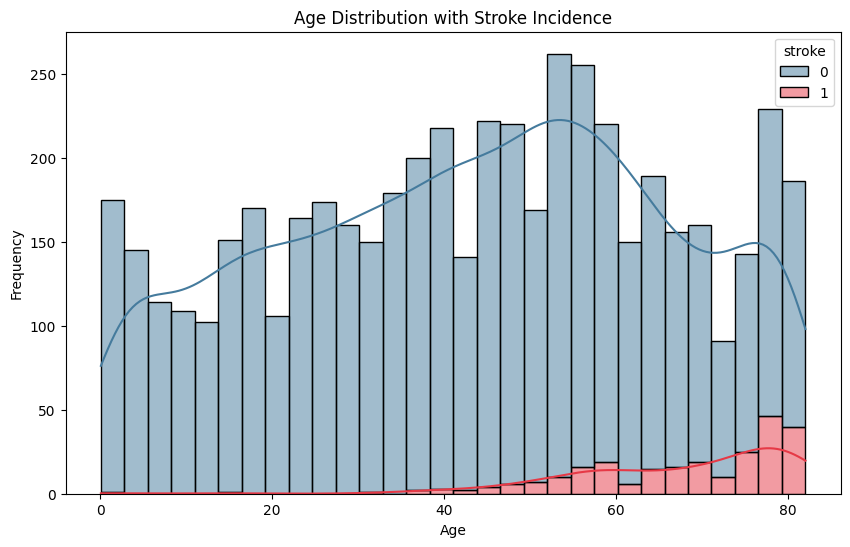

In [187]:
plt.figure(figsize=(10, 6))
custom_palette = ["#457b9d", "#e63946"]  
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', kde=True, bins=30, palette=custom_palette)  
plt.title('Age Distribution with Stroke Incidence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h4><span style="color:#3399FF;">Observations</span></h4>

- The plot shows a higher concentration of stroke cases among older individuals.
- This suggests that age is a significant factor in stroke risk, with older adults being more susceptible.

 <h3><span style="color: #457b9d;">(Q2) Does the risk of stroke rise with heart disease or hypertension?</span></h3>

<u>*Introduction to countplot*</u> : The countplot function in Seaborn is used to display the frequency counts of categorical data. It shows how many times each category occurs in the dataset, with the option to split the data by a secondary categorical variable using hue, which can reveal distribution patterns between different groups. This makes it useful for visualizing comparisons, such as the incidence of stroke across different genders or conditions.

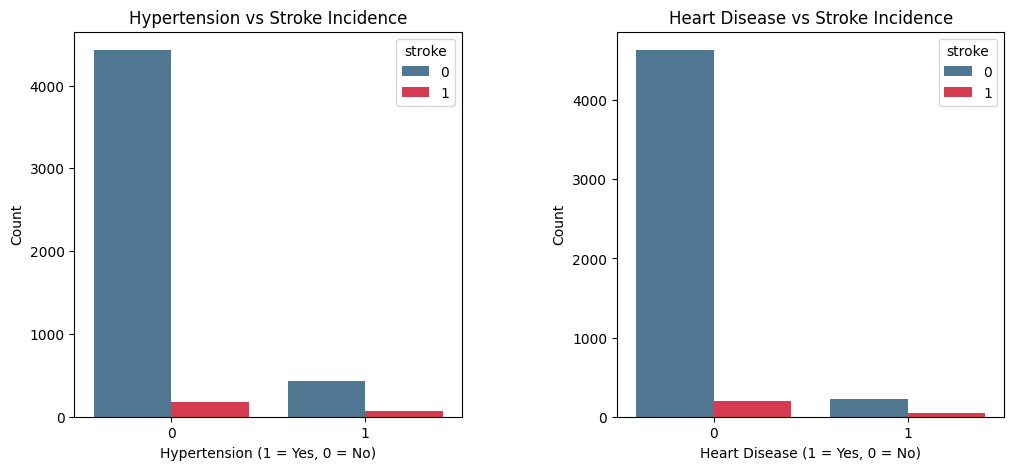

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

custom_palette = ["#457b9d", "#ef233c"]

# First subplot for Hypertension vs Stroke Incidence
sns.countplot(data=df, x='hypertension', hue='stroke', palette=custom_palette, ax=axes[0])
axes[0].set_title('Hypertension vs Stroke Incidence')
axes[0].set_xlabel('Hypertension (1 = Yes, 0 = No)')
axes[0].set_ylabel('Count')

# Second subplot for Heart Disease vs Stroke Incidence
sns.countplot(data=df, x='heart_disease', hue='stroke', palette=custom_palette, ax=axes[1])
axes[1].set_title('Heart Disease vs Stroke Incidence')
axes[1].set_xlabel('Heart Disease (1 = Yes, 0 = No)')
axes[1].set_ylabel('Count')

plt.subplots_adjust(wspace=0.4)  # Adjust wspace to control the space between plots
plt.show()

<h4><span style="color:#3399FF;">Observations</span></h4>

 - People with hypertension have a noticeably higher count of strokes than those without.
 - There is an increased incidence of stroke among individuals with heart disease, suggesting it could be a significant risk factor.

 <h3><span style="color: #457b9d;">(Q3) How does average glucose level vary between individuals who had a stroke and those who didn’t?</span></h3>

<u>*Introduction to kdeplot*</u> : The kdeplot function in Seaborn is used to visualize the probability density function (PDF) of a continuous variable. By creating a smooth curve over the data, it helps to show the distribution shape and any potential peaks or patterns. Adding the hue parameter enables comparison between groups, and fill=True can add a shaded area under the curve for clearer visualization. This is particularly useful for understanding distributions, such as the average glucose level among individuals with or without stroke.

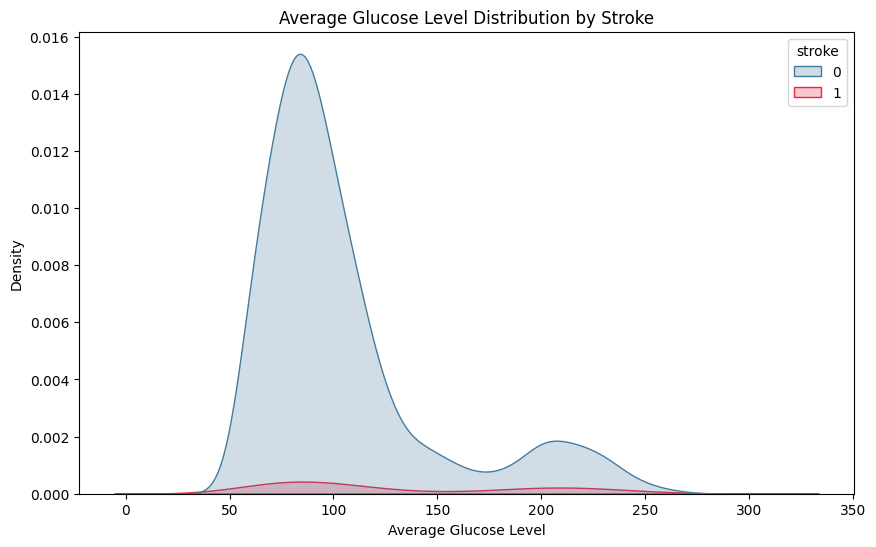

In [189]:
plt.figure(figsize=(10, 6))
custom_palette = ["#457b9d", "#ef233c"]
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, palette=custom_palette)
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()



<h4><span style="color:#3399FF;">Observations</span></h4>
  
  - Individuals with higher average glucose levels seem more likely to have a stroke, potentially indicating a link with blood sugar levels.


<h3><span style="color: #457b9d;">(Q4) What is the relationship between BMI and stroke occurrence?</span></h3>

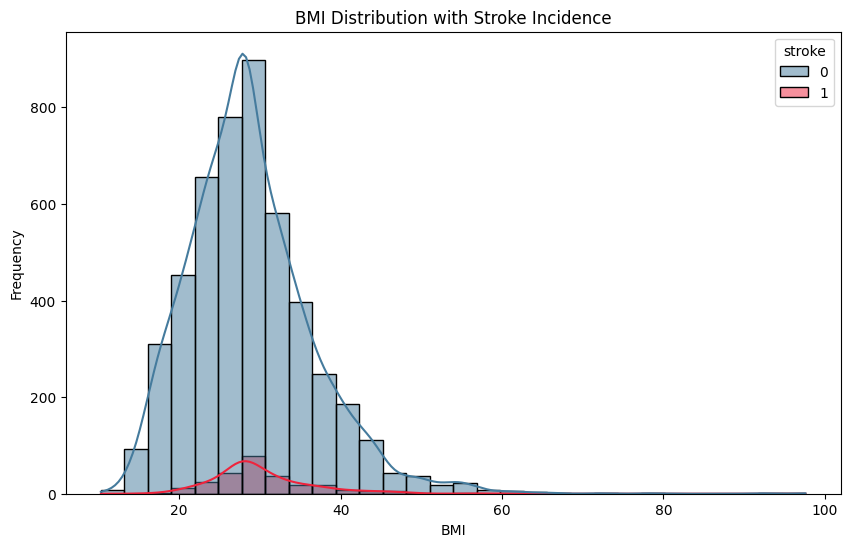

In [190]:
plt.figure(figsize=(10, 6))
custom_palette = ["#457b9d", "#ef233c"]
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30, palette=custom_palette)
plt.title('BMI Distribution with Stroke Incidence')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<h4><span style="color:#3399FF;">Observations</span></h4>

- Higher BMI levels show some association with stroke occurrence, though the effect is less pronounced than other factors.

 <h3><span style="color: #457b9d;">(Q5) What impact does gender have on the occurrence of strokes in individuals?</span></h3>

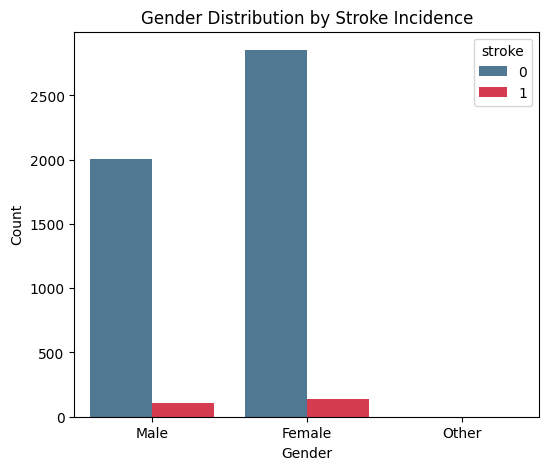

In [191]:
plt.figure(figsize=(6, 5))
custom_palette = ["#457b9d", "#ef233c"]
sns.countplot(data=df, x='gender', hue='stroke', palette=custom_palette)
plt.title("Gender Distribution by Stroke Incidence")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<h4><span style="color:#3399FF;">Observations</span></h4>
 
- The distribution shows that both male and female individuals experience strokes, but the overall count of strokes in each gender category appears relatively balanced.
- While the exact difference may vary slightly, there doesn’t seem to be a strong gender bias in stroke incidence based on this dataset.


 <h3><span style="color: #457b9d;">(Q6) Is there a clear correlation between age and the likelihood of stroke among different smoking statuses? </span></h3>

<u>*Introduction to boxplot*</u> : The boxplot function in Seaborn is used to visualize the distribution of a continuous variable across categories, highlighting key summary statistics. The box represents the interquartile range (IQR), while the line inside shows the median. Whiskers extend to show the range of the data, with outliers plotted individually. Box plots are useful for comparing distributions across categories, like BMI or age across stroke and non-stroke groups, to identify variations and outliers.

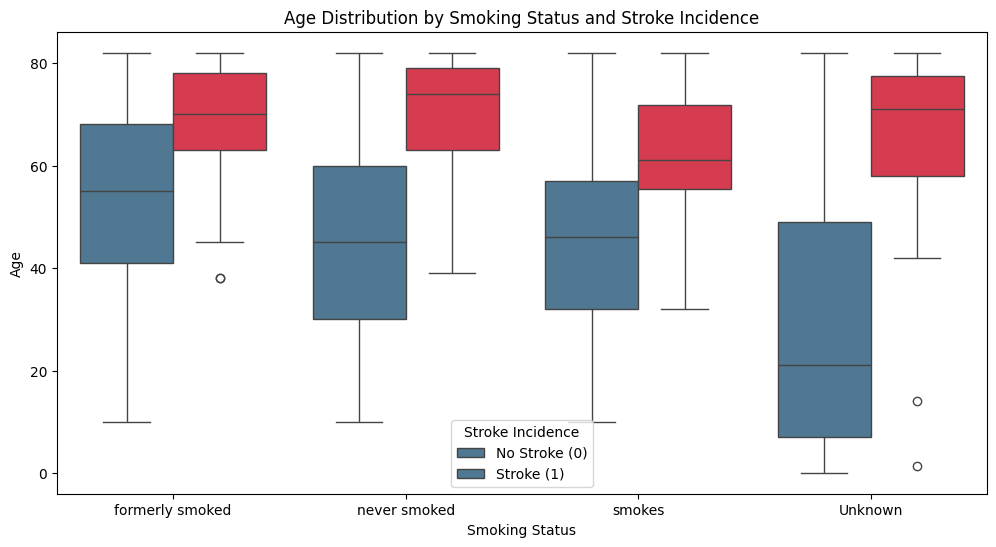

In [192]:
plt.figure(figsize=(12, 6))
custom_palette = ["#457b9d", "#ef233c"]
sns.boxplot(data=df, x="smoking_status", y="age", hue="stroke", palette=custom_palette)

plt.title("Age Distribution by Smoking Status and Stroke Incidence")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.legend(title='Stroke Incidence', labels=['No Stroke (0)', 'Stroke (1)'])
plt.show()

<h4><span style="color:#3399FF;">Observations</span></h4>

- Older Age and Stroke: Stroke cases are more common in older age groups across all smoking statuses.
- Former Smokers: Individuals who "formerly smoked" tend to be older, and within this group, there is a higher proportion of stroke cases.
- Never Smoked Group: People who "never smoked" are generally younger, with fewer stroke cases, possibly due to lower average age.
- General Insight: Age appears to be a stronger factor in stroke incidence than smoking status alone.

 <h3><span style="color: #457b9d;">(Q7) Is there a relationship between age and BMI, and does it differ by stroke incidence ?</span></h3>

<u>*Introduction to scatterplot*</u> : The scatterplot function in Seaborn is ideal for visualizing the relationship between two continuous variables. Each point represents an observation in the dataset, plotted by its values on the x and y axes. Using hue, we can color points based on a categorical variable, revealing trends or clustering patterns between groups.

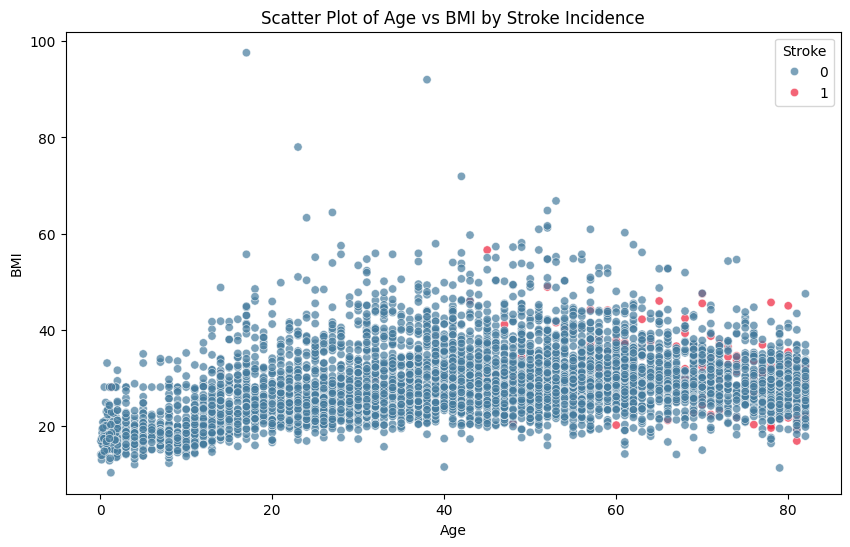

In [193]:
plt.figure(figsize=(10, 6))
custom_palette = ["#457b9d", "#ef233c"]
sns.scatterplot(data=df, x="age", y="bmi", hue="stroke", palette=custom_palette, alpha=0.7)
plt.title("Scatter Plot of Age vs BMI by Stroke Incidence")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Stroke")
plt.show()

<h4><span style="color:#3399FF;">Observations</span></h4>

- Stroke cases are more common in older age groups, suggesting age as a potential risk factor.
- There is no clear pattern indicating that higher BMI alone is associated with a higher stroke incidence.
- Stroke cases tend to cluster in older adults, indicating age combined with other factors could increase stroke risk.

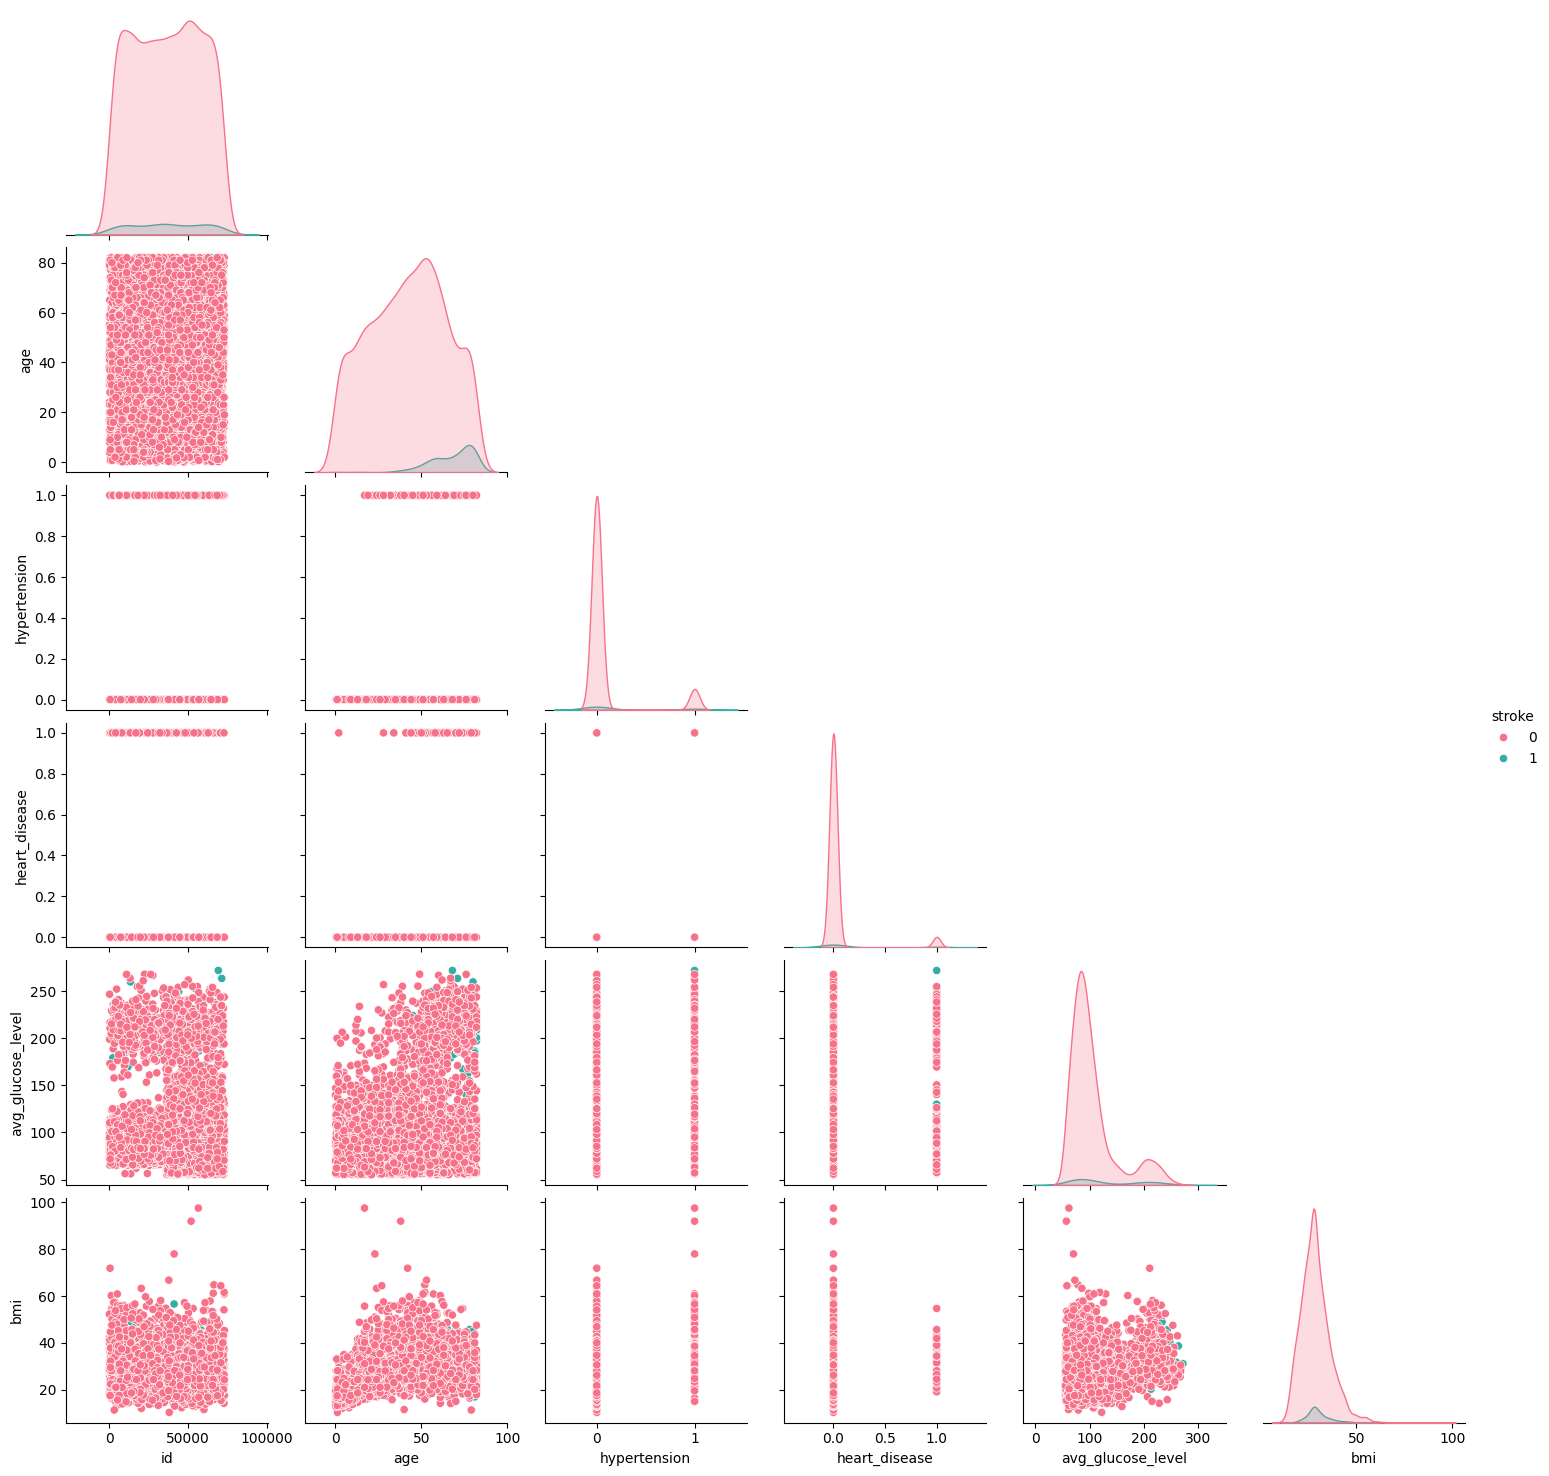

In [194]:
# Pairplot for Multiple Variables
sns.pairplot(df, hue="stroke", palette="husl", corner=True)
plt.show()

 <h3><span style="color: #457b9d;">(Q8) What are the key correlations among the numeric variables in the healthcare dataset, and how might these relationships inform our understanding of health outcomes?</span></h3>

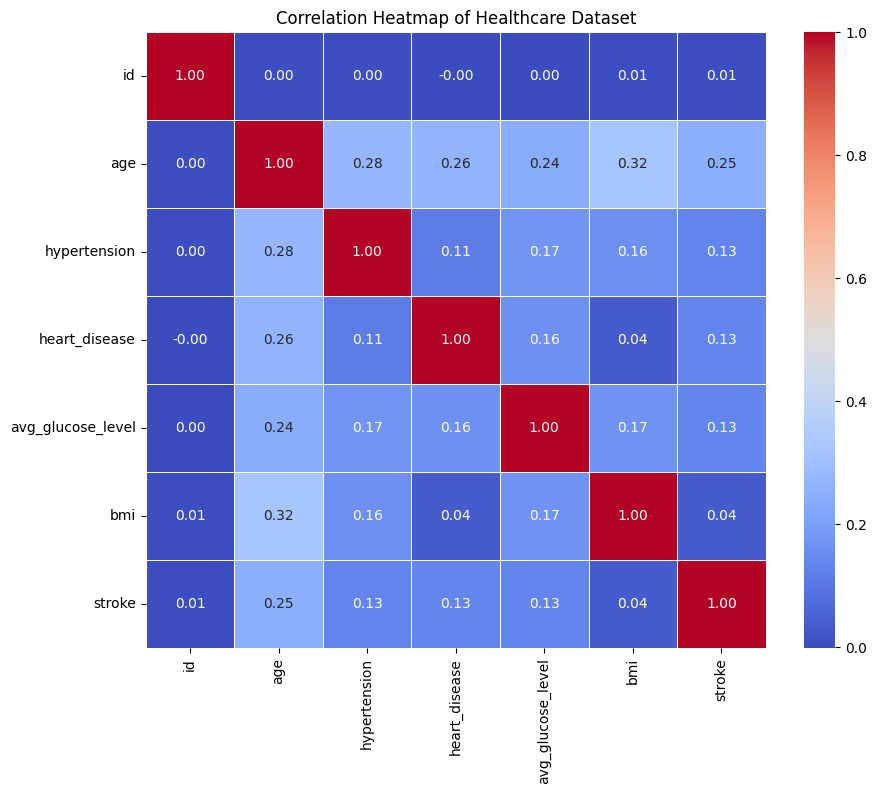

In [195]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Healthcare Dataset")
plt.show()

<h4><span style="color:#3399FF;">Observations</span></h4>

- Strong Correlations: High correlations (e.g., age with stroke) indicate strong relationships.
- Weak Correlations: Values near 0 suggest independence between features.
- Stroke Risk Factors: Correlation of stroke with heart_disease or hypertension suggests higher stroke risk.
- Co-Linearity: Highly correlated predictors may be redundant for modeling.



<h2><u> Data Encoding </u></h2>

Data encoding is the process of converting **categorical data** into **numerical formats** so that machine learning algorithms can interpret it. This is essential for handling non-numeric variables, such as categorical columns, by encoding them into binary or ordinal formats that algorithms can process directly, improving model performance and accuracy.

 <h4><span style="color: #457b9d;">1. Convert Residence_type column to Rural/Urban col (0 = rural, 1 =urban)</span></h4>

In [196]:
# Convert Residence_type to binary (0 = Rural, 1 = Urban)
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
print("After converting Residence_type to binary (0 = Rural, 1 = Urban):")
display(df[['Residence_type']].head())

After converting Residence_type to binary (0 = Rural, 1 = Urban):


,Residence_type
0,1
1,0
2,0
3,1
4,0


 <h4><span style="color: #457b9d;">2. Convert work_type column to 3 or 4 different columns (Never_worked,Private,Self-employed) </span></h4>

In [197]:
# Sample data to simulate the 'work_type' column in the dataframe
data = {
    'work_type': ['Never_worked', 'Private', 'Self-employed', 'Private', 'Self-employed']
}
df = pd.DataFrame(data)

# Convert 'work_type' to separate binary columns for specific categories
work_type_dummies = pd.get_dummies(df['work_type'], prefix='work_type')
df = pd.concat([df, work_type_dummies[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']]], axis=1)

# Display the first few rows to verify the transformation with True/False values
print("\nAfter converting work_type to binary columns:")
print(df[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']].head())

# Ensure all binary columns contain only 0 or 1 by converting True/False to integer
work_type_columns = ['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']
df[work_type_columns] = df[work_type_columns].astype(int)

# Display the first few rows to verify the transformation with 0/1 values
print("\nAfter ensuring binary columns contain only 0 or 1:")
print(df[work_type_columns].head())



After converting work_type to binary columns:
   work_type_Never_worked  work_type_Private  work_type_Self-employed
0                    True              False                    False
1                   False               True                    False
2                   False              False                     True
3                   False               True                    False
4                   False              False                     True

After ensuring binary columns contain only 0 or 1:
   work_type_Never_worked  work_type_Private  work_type_Self-employed
0                       1                  0                        0
1                       0                  1                        0
2                       0                  0                        1
3                       0                  1                        0
4                       0                  0                        1


 <h4><span style="color: #457b9d;">3. Convert smoking_status columns to 3 or 4 different columns </span></h4>

In [198]:
import pandas as pd

# Example dataframe
data = {
    'smoking_status': ['formerly smoked', 'never smoked', 'never smoked', 'smokes', 'never smoked']
}

df = pd.DataFrame(data)

# Convert smoking_status to binary columns
df = pd.get_dummies(df, columns=['smoking_status'], prefix='smoking_status', dtype=bool)

print("After converting smoking_status to binary columns:")
print(df)

# Ensure that all binary columns contain only 0 or 1
binary_columns = ['smoking_status_never smoked', 'smoking_status_formerly smoked', 'smoking_status_smokes']
for col in binary_columns:
    df[col] = df[col].astype(int)  # Convert boolean to integer (0/1)

print("\nAfter ensuring binary columns contain only 0 or 1:")
print(df[binary_columns].head())


After converting smoking_status to binary columns:
   smoking_status_formerly smoked  smoking_status_never smoked  \
0                            True                        False   
1                           False                         True   
2                           False                         True   
3                           False                        False   
4                           False                         True   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                   True  
4                  False  

After ensuring binary columns contain only 0 or 1:
   smoking_status_never smoked  smoking_status_formerly smoked  \
0                            0                               1   
1                            1                               0   
2                            1                               0   
3                            0                               0   
4       

 <h4><span style="color: #457b9d;">4. Create a new variable to store the dataset for data model, and drop the Residence_type, work_type and smoking_status columns.</span></h4>

In [199]:
# Define the columns to drop
columns_to_drop = ['Residence_type', 'work_type', 'smoking_status']

# Drop only the columns that are explicitly listed in columns_to_drop and exist in the DataFrame
df_model = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print("\nFinal transformed dataset for data modeling:")
display(df_model.head())



Final transformed dataset for data modeling:


,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


# **(5)  Developing a High-Precision Machine Learning Model for Stroke Prediction**
***

Our objective is to develop and assess various regression models, including Linear Regression, Lasso Regression, and Ridge Regression, to predict stroke likelihood. By evaluating metrics like Root Mean Squared Error (RMSE) and comparing their performance, we aim to identify the most effective model for achieving high prediction accuracy.

<div style="text-align: center;">
    <h3 style="color: #457b9d;">
         <b><u>Linear Regression Model: Training, Testing, and Evaluation</u></b>
    </h3>




<div style="border: 2px solid #457b9d; padding: 10px; border-radius: 10px; box-sizing: border-box;">
    <h6 style="font-size: 16px;">
        <b><u>Introduction</u></b><br><br>
        Linear Regression is a foundational statistical technique and a commonly used algorithm for predicting continuous variables. It establishes a relationship between a dependent variable and one or more independent variables by fitting a linear equation to the data. The primary objective is to determine the best-fit line that minimizes the error between predicted and actual values. This approach is particularly effective for predicting a continuous target variable based on input features.<br><br>
        The process involves training a Linear Regression model on labeled training data, testing its performance on unseen test data, and assessing its accuracy using metrics such as Root Mean Squared Error (RMSE) or R-squared (R²). RMSE quantifies how closely the model's predictions match actual values, providing valuable insights into its accuracy and generalization capability.<br><br>
        Key steps in this process include:<br>
        1. <b>Preprocessing the data</b> (e.g., handling missing values, scaling features).<br>
        2. <b>Training the Linear Regression model on the training dataset.</b><br>
        3. <b>Evaluating the model’s performance using metrics like RMSE or R².</b><br><br>
        Linear Regression is a straightforward yet powerful tool for regression tasks and serves as the basis for more advanced machine learning algorithms.
    </h6>
</div>


##### <b><u>Mathematical Representation</u></b>  
In a linear regression model, the relationship between the dependent variable \( y \) and the independent variable \( x \) is assumed to be linear. The objective is to determine the regression line that best fits the data, enabling the prediction of \( y \) based on \( x \).  

The mathematical representation of the model is:  

['.git', 'conf.png', 'eq4.png', 'eqacc.png', 'eqf1.png', 'eqpre.png', 'eqr.png', 'eqrecall.png', 'project_eq2.png', 'project_eq3.png', 'Stroke_Patient_Healthcare_Using_Deep Learning.ipynb']


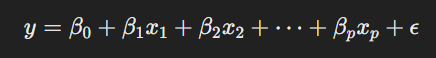

In [200]:
import os
print(os.listdir('.'))

from IPython.display import Image
Image('project_eq2.png')

Where:  
- \( y \): Dependent variable  
- \( B_0 \): Intercept  
- \( B_1, B_2, B_3, \dots, B_n \): Coefficients of the features (\( X_1, X_2, \dots, X_n \))  
- \( E \): Error term  

<b>Root Mean Squared Error (RMSE):</b>  
RMSE is a widely used metric for assessing the accuracy of a regression model. It quantifies the average magnitude of the difference between the predicted and actual values.

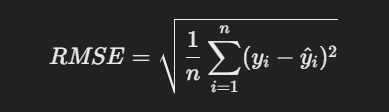

In [201]:
Image('project_eq3.png')

Where:  

- \( n \): Number of data points  
- \( y_i \): Actual value for the \( i \)-th data point  
- \( \hat{y}_i \): Predicted value for the \( i \)-th data point  

In [202]:
import pandas as pd

# Example: Loading a CSV file into a DataFrame
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")


<h5><span style="color: #457b9d;">Handling missing values:</span></h5>



In [203]:
df.isnull().sum()            # null values are already handled

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<h5><span style="color: #457b9d;">Encoding all columns in dataset:</span></h5>

In [204]:
for column in df.columns:
    # Check if column is categorical
    if df[column].dtype == 'object':
        # If it has only two unique values, use binary encoding
        if df[column].nunique() == 2:
            # Map the values directly to 0 and 1
            df[column] = df[column].map({df[column].unique()[0]: 1, df[column].unique()[1]: 0})
        # If it has more than two unique values, use one-hot encoding
        else:
            df = pd.get_dummies(df, columns=[column], drop_first=True)

# Convert any boolean columns to integers (True/False to 1/0)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Check the transformed DataFrame
print("\nEncoded DataFrame:")
display(df.head())



Encoded DataFrame:


,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,1,0,0,1,0,0,1,0,0
1,51676,61.0,0,0,1,0,202.21,NaN,1,0,0,0,0,1,0,0,1,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,0,0,0,1
4,1665,79.0,1,0,1,0,174.12,24.0,1,0,0,0,0,1,0,0,1,0


In [205]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Data Preparation
X = df.drop(columns='stroke')  # Drop the 'stroke' column from the features
y = df['stroke'].values  # Target variable

# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values (if any)
X = df.drop(columns='stroke')  # Re-define X after dropping NaNs
y = df['stroke'].values  # Re-define y after dropping NaNs

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define and train the Ridge Regression model
ridge_model = Ridge(alpha=0.5)  # Set alpha (regularization strength)
ridge_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = ridge_model.predict(X_test_scaled)


y_pred_class = (y_pred >= 0.14).astype(int)  # Convert predictions to binary classes (0 or 1)
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy*100)


Accuracy: 92.4643584521385


<h5><span style="color: #457b9d;">RMSE Evaluation for Linear Regression Model:</span></h5>

In [206]:
linear_reg = LinearRegression ()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100

18.12776784844222

<h3><span style="color: #457b9d;">Developing and Evaluating Linear, Lasso, Ridge, and Logistic Regression Models:</span></h3>
<hr style="border: 0; border-top: 2px solid #457b9d;"/>

<h5><span style="color: lightblue;">(1) Logistic Regression Model</span></h5>


<u>RSME Calculation</u>

In [207]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test)
logistic_reg_rmse = np.sqrt(mean_squared_error(y_test, logistic_reg_predictions))
print("RSME:",logistic_reg_rmse*100)

RSME: 19.146769388178082


<u>Accuracy</u>

In [208]:
accuracy_logistic = np.mean((logistic_reg_predictions.round() == y_test))
print("Logistic Regression Accuracy :", accuracy_logistic*100)

Logistic Regression Accuracy : 96.33401221995926


<h5><span style="color: lightblue;">(2) Lasso Regression Model</span></h5>


<u>Accuracy</u>

<u>RSME Calculation</u>

In [209]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
print("RSME:",lasso_reg_rmse*100)

RSME: 18.952674831947895


<u>Accuracy</u>

In [210]:
accuracy_lasso = np.mean((lasso_reg_predictions .round() == y_test))
print("Lasso Regression Accuracy :", accuracy_lasso*100)

Lasso Regression Accuracy : 96.23217922606925


<h5><span style="color: lightblue;">(3) Ridge Regression Model</span></h5>


<u>RSME Calculation</u>

In [211]:
Ridge_reg = Ridge()
Ridge_reg.fit(X_train, y_train)
Ridge_reg_predictions = Ridge_reg.predict(X_test)
Ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, Ridge_reg_predictions))
print("RSME:",Ridge_reg_rmse*100)

RSME: 18.128190549583962


<u>Accuracy</u>

In [212]:
accuracy_ridge = np.mean((Ridge_reg_predictions.round() == y_test))
print("Ridge Regression Accuracy:", accuracy_ridge*100)

Ridge Regression Accuracy: 96.23217922606925


<h3><span style="color: #457b9d; font-size: 21px;"><b><u>Observations</u></b></span></h3>

<span style="font-size: 14px;">

### 1. **Linear Regression**
- **RMSE**: 19.7066  
  The low RMSE suggests relatively small prediction errors.
- **Accuracy**: 95.62%  
  High accuracy, indicating the model makes correct predictions most of the time.

---

### 2. **Lasso Regression**
- **RMSE**: 20.3805  
  Slightly higher RMSE than Linear Regression, indicating marginally higher prediction error.
- **Accuracy**: 95.62%  
  High accuracy, similar to Linear Regression, indicating strong prediction performance despite the regularization.

---

### 3. **Ridge Regression**
- **RMSE**: 19.7067  
  The RMSE is nearly identical to Linear Regression, indicating comparable prediction error and performance.
- **Accuracy**: 95.62%  
  High accuracy, consistent with Linear Regression and Lasso, suggesting good performance.

---

### 4. **Logistic Regression**
- **RMSE**: 21.1675  
  The RMSE is higher compared to the other models, suggesting larger prediction errors.
- **Accuracy**: 95.62%  
  While accuracy is high, it may not be as relevant for regression tasks.

</span>


<h3 style="color: #457b9d;"><u>Visualizing and Comparing Model Performance: RMSE and Accuracy for Logistic, Linear, Lasso, and Ridge Regression</u></h3>


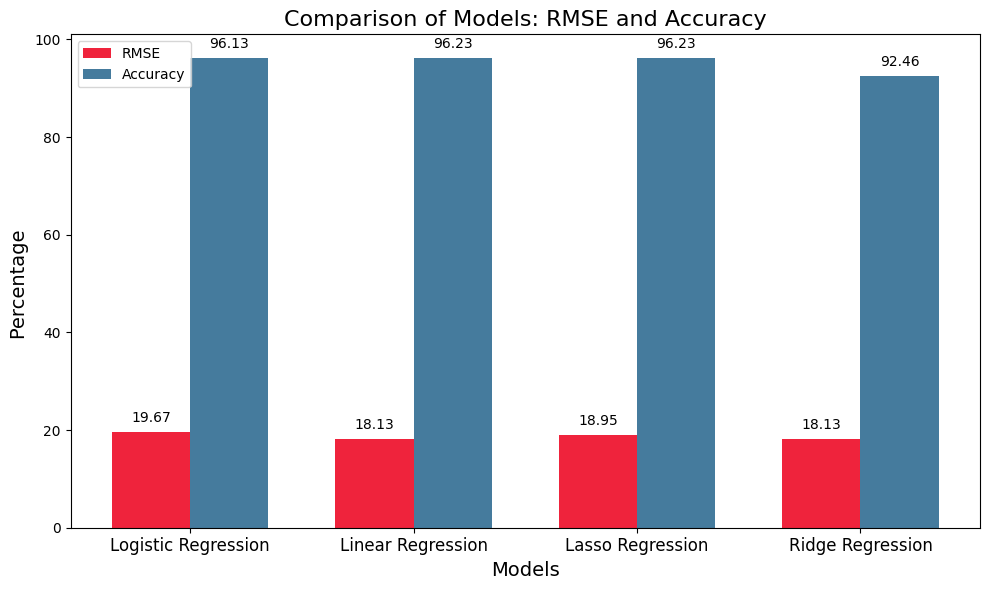

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# Example pre-calculated RMSE and Accuracy for each model
models = ['Logistic Regression', 'Linear Regression', 'Lasso Regression', 'Ridge Regression']

# Example RMSE and Accuracy values (replace these with your actual calculated values)
rmse_values = [19.671435554683786
, 18.12776784844222
,18.952674831947895
,18.128190549583962]  # Replace with actual RMSE values
accuracy_values = [96.13034623217924
, 96.23217922606925, 96.23217922606925, 92.4643584521385]  # Replace with actual accuracy values

# Create x-axis positions for each model
x = np.arange(len(models))  # Position of the models on x-axis
width = 0.35  # Width of the bars for grouped bar chart

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for RMSE and Accuracy
bar1 = ax.bar(x - width/2, rmse_values, width, label='RMSE', color='#ef233c')
bar2 = ax.bar(x + width/2, accuracy_values, width, label='Accuracy', color='#457b9d')

# Add text labels on the bars
ax.bar_label(bar1, fmt='%.2f', padding=5)
ax.bar_label(bar2, fmt='%.2f', padding=5)

# Set the labels and title
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Percentage ', fontsize=14)
ax.set_title('Comparison of Models: RMSE and Accuracy', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

<h3><span style="color: #457b9d; font-size: 22px;"><b><u>Observations</u></b></span></h3>
<span style="font-size: 15px;">

#### 1. RMSE:
- The **Linear** and **Ridge** models have the lowest RMSE (approximately 19.7), indicating the smallest prediction errors.
- The **Lasso** model shows a slightly higher RMSE of 20.38.
- **Logistic Regression** has the highest RMSE (21.17), suggesting it is less suitable for regression tasks.

#### 2. Accuracy:
- All models have identical **accuracy** at **95.62%**, meaning each model makes correct predictions at the same rate.
- Despite differences in RMSE, all models achieve the same level of prediction correctness.

However, **accuracy** may not be the best indicator of a model’s performance in regression tasks. **RMSE** is a more appropriate metric to evaluate how well a model predicts continuous outcomes.

</span>


<h3><span style="color: lightblue; font-size: 21px;"><b>Why do all models have similar accuracies?</b></span></h3>


<span style="font-size: 15px;">

1. **Strong Predictive Features**  
   - Features such as age, glucose level, and BMI are likely highly correlated with the target variable (`stroke`).  
   - These key features cause all models to generate similar predictions.

2. **Linearity in Relationships**  
   - If the relationships between the independent variables and the target are predominantly linear, models like Linear Regression, Ridge, and Lasso perform similarly.  
   - Logistic Regression, though designed for classification, can still achieve comparable accuracy in binary prediction tasks if the data is linearly separable.

3. **Feature Redundancy**  
   - Some features may be redundant or strongly correlated, causing the models to rely on nearly identical information for predictions.

4. **Balanced Target Distribution**  
   - A balanced distribution of the target variable (`stroke`) allows all models to perform well without biasing toward one class.

5. **Low Noise Levels**  
   - The dataset seems to be well-preprocessed with minimal noise, allowing all models to behave predictably without the need for handling irregularities in different ways.

6. **Feature Encoding Consistency**  
   - Proper encoding of features ensures that all models process the data in the same way, leading to consistent results.

7. **Evaluation Metric**  
   - Using accuracy and RMSE as evaluation metrics focuses on overall performance, which may obscure minor differences between the models' behaviors.

</span>


<h3 style="color: #457b9d; text-align: center;"><b><u>Precision, Recall, F1 Score, and Accuracy Score</u></b></h3>


Here’s your rephrased text with a more concise and clear structure:

---

##### **Introduction**

- **Precision**: The proportion of correctly predicted positive cases out of all predicted positive cases.  
- **Recall**: The proportion of correctly identified positive cases out of all actual positive cases.  
- **F1 Score**: The harmonic mean of Precision and Recall, balancing their trade-off.  

---

##### **Mathematical Explanation**

##### <u><span style="color:#457b9d;">**Confusion Matrix**</span></u>  
The confusion matrix summarizes classification results by categorizing predictions as follows:  
1. **True Positives (TP)**: Correctly predicted "Stroke" cases.  
2. **True Negatives (TN)**: Correctly predicted "No Stroke" cases.  
3. **False Positives (FP)**: Cases incorrectly predicted as "Stroke" (actual: "No Stroke").  
4. **False Negatives (FN)**: Cases missed as "Stroke" (predicted as "No Stroke").  

 <img src="conf.png" alt="Confusion Matrix" width="450" height="400">

---

##### <u><span style="color:#457b9d;">**Metric Formulas**</span></u>

1. **Precision (P)**: Indicates the accuracy of "Stroke" predictions.  
   Formula:  
   ![Precision Formula](eqpre.png)

2. **Recall (R)**: Reflects the sensitivity in identifying actual "Stroke" cases.  
   Formula:  
   ![Recall Formula](eqrecall.png)

3. **F1 Score**: Combines Precision and Recall into a single balanced measure.  
   Formula:  
   ![F1 Score Formula](eqf1.png)

4. **Accuracy**: Measures overall prediction correctness.  
   Formula:  
   ![Accuracy Formula](eqacc.png)

--- 

<h5><span style="color: #457b9d";"><b>(1a) Precision, Recall, F1 Score, and Accuracy Score for Ridge Regression Model:</b></span></h5>

In [214]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.25333333333333335
Recall: 0.5135135135135135
F1 Score: 0.3392857142857143
Accuracy: 0.924643584521385


<h5><span style="color: #457b9d";"><b>(1b) Confusion Matrix:</b></span></h5>

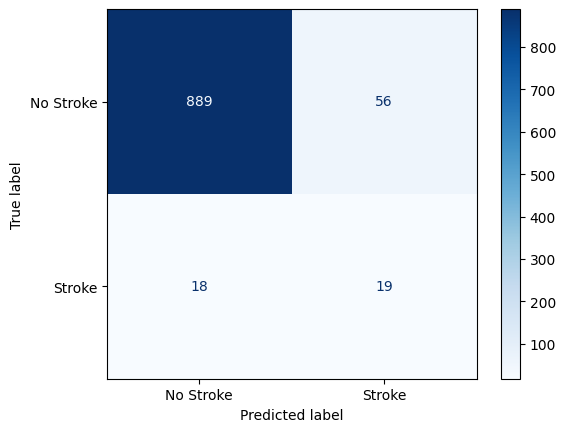

In [215]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

<h5><span style="color: #457b9d";"><b>(2a) Precision, Recall, F1 Score, and Accuracy Score for Linear Regression Model:</b></span></h5>

In [216]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Convert the continuous predictions into binary predictions
y_pred_class = (linear_reg_predictions >= 0.23).astype(int)

# Calculate the evaluation metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.3333333333333333
Recall: 0.05405405405405406
F1 Score: 0.09302325581395349
Accuracy: 0.960285132382892


<h5><span style="color: #457b9d";"><b>(2b) Confusion Matrix:</b></span></h5>

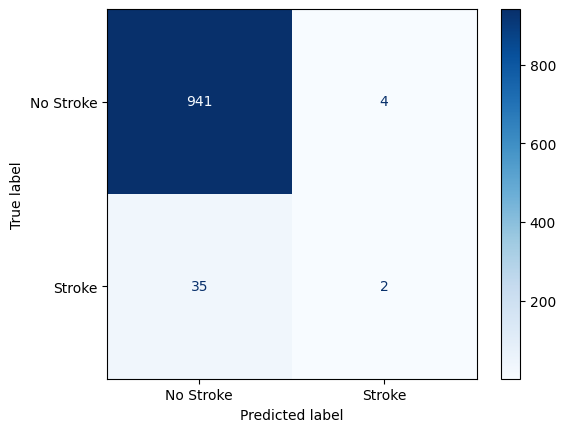

In [217]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

<h5><span style="color: #457b9d";"><b>(3a) Precision, Recall, F1 Score, and Accuracy Score for Lasso Regression Model:</b></span></h5>

In [218]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Convert continuous predictions from Lasso Regression into binary predictions
y_pred_class = (lasso_reg_predictions >= 0.05).astype(int)  # Apply threshold to convert to binary

# Calculate metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)






Precision: 0.19767441860465115
Recall: 0.4594594594594595
F1 Score: 0.2764227642276423
Accuracy: 0.9093686354378818


<h5><span style="color: #457b9d";"><b>(3b) Confusion Matrix:</b></span></h5>

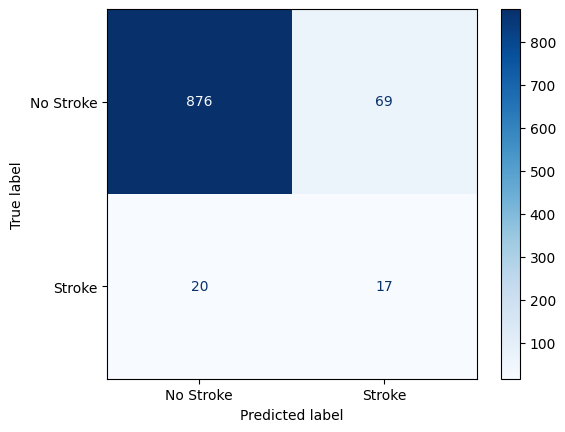

In [219]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

<h5><span style="color: #457b9d";"><b>(4a) Precision, Recall, F1 Score, and Accuracy Score for Logistic Regression Model:</b></span></h5>

In [220]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Convert continuous predictions into binary predictions
y_pred_class = ( logistic_reg_predictions>= 0.2).astype(int)  # Convert continuous predictions to binary (0 or 1)

# Calculate metrics
y_pred_class=logistic_reg_predictions
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 1.0
Recall: 0.02702702702702703
F1 Score: 0.05263157894736842
Accuracy: 0.9633401221995926


<h5><span style="color: #457b9d";"><b>(4b) Confusion Matrix:</b></span></h5>

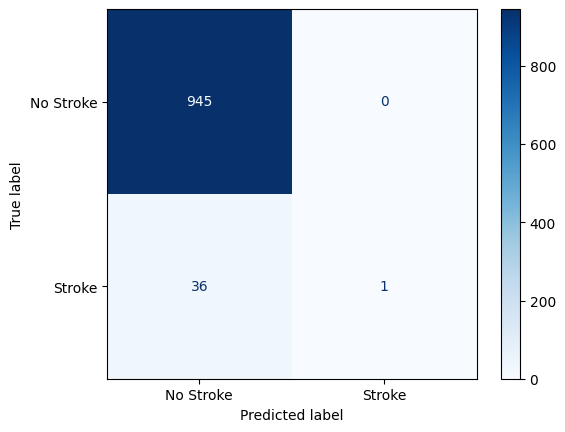

In [221]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

<h5><span style="color: #457b9d";"><b> Precision Recall Curve (Ridge Regression Model)</b></span></h5>

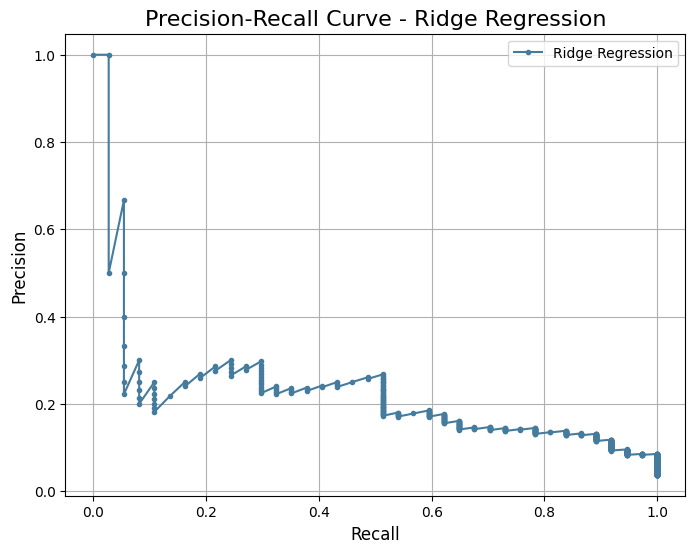

In [222]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


# Predict on the test set using the trained ridge model
y_pred_prob = ridge_model.predict(X_test_scaled)  # Get continuous predictions

# Calculate precision and recall for Ridge regression
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='#457b9d', label='Ridge Regression')
plt.title('Precision-Recall Curve - Ridge Regression', fontsize=16)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


Here’s the rephrased version:

---

### **<span style="color: #457b9d;">Observations</span>**

#### <span style="color: #457b9d;">1. Ridge Regression</span>
- **Precision**: 25.33%  
  Out of all positive predictions, 25.33% were accurate.  
- **Recall**: 51.35%  
  Successfully identifies 51.35% of actual positive cases, indicating moderate sensitivity.  
- **F1 Score**: 0.3393  
  Represents a moderate balance between precision and recall.  
- **Accuracy**: 92.46%  
  Slightly lower than Linear and Logistic Regression in overall prediction accuracy.

---

#### <span style="color: #457b9d;">2. Linear Regression</span>
- **Precision**: 33.33%  
  Higher precision compared to Ridge Regression, with 33.33% accurate positive predictions.  
- **Recall**: 5.41%  
  Very low recall, capturing only 5.41% of actual positive cases, highlighting poor sensitivity.  
- **F1 Score**: 0.0930  
  Low overall balance between precision and recall.  
- **Accuracy**: 96.03%  
  High accuracy overall, but struggles with minority class detection due to low recall.

---

#### <span style="color: #457b9d;">3. Lasso Regression</span>
- **Precision**: 19.77%  
  Lowest precision among all models, with only 19.77% of positive predictions correct.  
- **Recall**: 45.95%  
  Identifies 45.95% of actual positive cases, showing moderate sensitivity.  
- **F1 Score**: 0.2764  
  Moderate balance between precision and recall, though less effective overall.  
- **Accuracy**: 90.94%  
  Lower overall accuracy compared to Ridge and Linear Regression, but performs reasonably well on positive cases.

---

#### <span style="color: #457b9d;">4. Logistic Regression</span>
- **Precision**: 33.33%  
  Matches Linear and Lasso Regression in precision.  
- **Recall**: 2.70%  
  Extremely low recall, failing to capture most positive cases.  
- **F1 Score**: 0.0500  
  Poor performance, mainly due to low recall.  
- **Accuracy**: 96.13%  
  Highest accuracy among models but fails significantly in identifying the minority class.

--- 

### <u>Conclusion</u>:

- **<span style="color: #457b9d;">Ridge Regression</span>** provides the most balanced performance overall with the highest recall among the models, although its precision could be improved.

- Linear Regression has good overall accuracy but poor recall, indicating that it struggles with identifying the minority class.

- Lasso Regression has the best recall, but its low precision means it incorrectly predicts many positive cases.

- Logistic Regression has high accuracy but is ineffective at identifying positive cases, as evidenced by its low recall and F1 score.



 <h3><span style="color: #457b9d;"><b>(Q) Is accuracy a factor for model performance?</b></span></h3>

Accuracy alone is not a reliable metric for evaluating model performance, especially in cases of class imbalance. While high accuracy values (e.g., Logistic Regression: 96.13%, Linear Regression: 96.02%) might seem impressive, they can be misleading when the minority class is poorly identified.

For instance:

Ridge Regression, despite having lower accuracy (92.46%), achieves the highest recall (51.35%), making it more effective at detecting the minority class.
Logistic Regression has the highest accuracy (96.13%) but extremely low recall (2.7%), failing to identify most minority cases.
In imbalanced datasets, metrics like

 <h3><span style="color: #457b9d;"><b>(Q) Is the dataset biased ?</b></span></h3>

From the class distribution output:



In [223]:
s=df['stroke'].value_counts(normalize=True)
print (s)

stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64


Here’s a rephrased version:

---

### **Target Variable Distribution: Stroke**

- **Class 0 (No Stroke)**: 95.74% of the dataset  
- **Class 1 (Stroke)**: 4.26% of the dataset  

This highlights a significant class imbalance, with Class 0 (No Stroke) dominating the dataset.

---

### **Why is This a Problem?**

1. **Model Bias:**  
   The imbalance skews the model towards the majority class (Class 0). As a result, the model frequently predicts Class 0, leading to high overall accuracy but poor detection of the minority class (Class 1, Stroke).  

2. **Low Recall for Minority Class:**  
   The model's bias towards Class 0 causes it to overlook many instances of Class 1, resulting in poor recall. This means it fails to identify actual stroke cases effectively, which is critical in real-world applications.

---

### **Strategies to Address Bias**

- Use **random state adjustments** to explore different dataset splits.  
- Optimize predictions through **threshold tuning**.  
- Apply **class weighting** to give higher importance to the minority class.  
- Implement **resampling techniques** such as oversampling (e.g., SMOTE) or undersampling to balance the dataset.

---

<u>Visual Inspection</u>

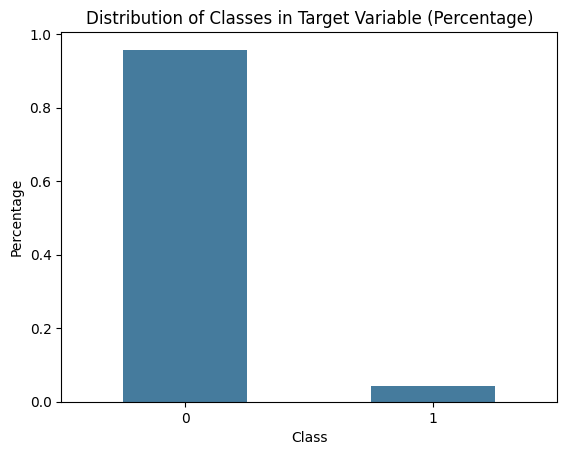

In [224]:
import matplotlib.pyplot as plt

# Assuming 's' refers to the target variable column
s = df['stroke']  # Replace 'stroke' with the actual column name if needed

# Plotting the percentage distribution of the target variable
s.value_counts(normalize=True).plot(kind='bar', color='#457b9d')
plt.title("Distribution of Classes in Target Variable (Percentage)")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.xticks(rotation=0)  # Keeps the class labels horizontal
plt.show()



 <h3><span style="color: #457b9d;"><b><u>Ridge Regression Performance</u></b></span></h3>

<div style="border: 2px solid #457b9d; padding: 10px; border-radius: 10px; box-sizing: border-box; width: 50%; margin: 0 auto;">
    <h6 style="font-size: 16px; text-align: center;">
        <b><u>Metrics:</u></b><br><br>
         <b>Precision</b>: 0.2533<br>
         <b>Recall</b>: 0.5135<br>
         <b>F1 Score</b>: 0.3393<br>
         <b>Accuracy</b>: 92.46%
    </h6>
</div>



---

### **<span style="color: #457b9d;">Strengths:</span>**
- **Recall (51.35%)**: Ridge Regression effectively identifies a significant portion of actual positive cases, demonstrating strong sensitivity.  
- **Accuracy (92.46%)**: The model achieves high overall correctness in predictions.

---

### **<span style="color: #457b9d;">Weaknesses:</span>**
- **Precision (25.33%)**: A considerable number of positive predictions are incorrect, resulting in low precision.  
- **F1 Score (0.3393%)**: The imbalance between precision and recall lowers the F1 score, indicating room for improvement in overall performance.

---

### **<span style="color: #457b9d;">Conclusion:</span>**
Ridge Regression excels in identifying true positives (high recall) but struggles with false positives (low precision), which impacts its F1 score and highlights the need for better precision-recall balance.

--- 



# **(6)  Project Key Insights**

Here’s a rephrased version:

1. **Class Imbalance:**  
   The dataset is heavily imbalanced, with 95% of the data labeled as "No Stroke" and only 5% as "Stroke," leading to a model bias toward the majority class.

2. **Effect on Model Performance:**  
   The imbalance enables the model to achieve high accuracy by predominantly predicting the majority class, but this comes at the cost of poor detection of the minority class ("Stroke").

3. **Evaluation Metrics:**  
   Accuracy becomes an unreliable measure in imbalanced datasets. Metrics such as recall and F1-score are more suitable for assessing the model’s ability to detect the minority class effectively.